In [1]:
!pip install torch torchvision torchaudio
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 16517 (delta 47), reused 55 (delta 17), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.12 MiB | 19.26 MiB/s, done.
Resolving deltas: 100% (11309/11309), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-11 Python-3.10.12 torch-2.1.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 110MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


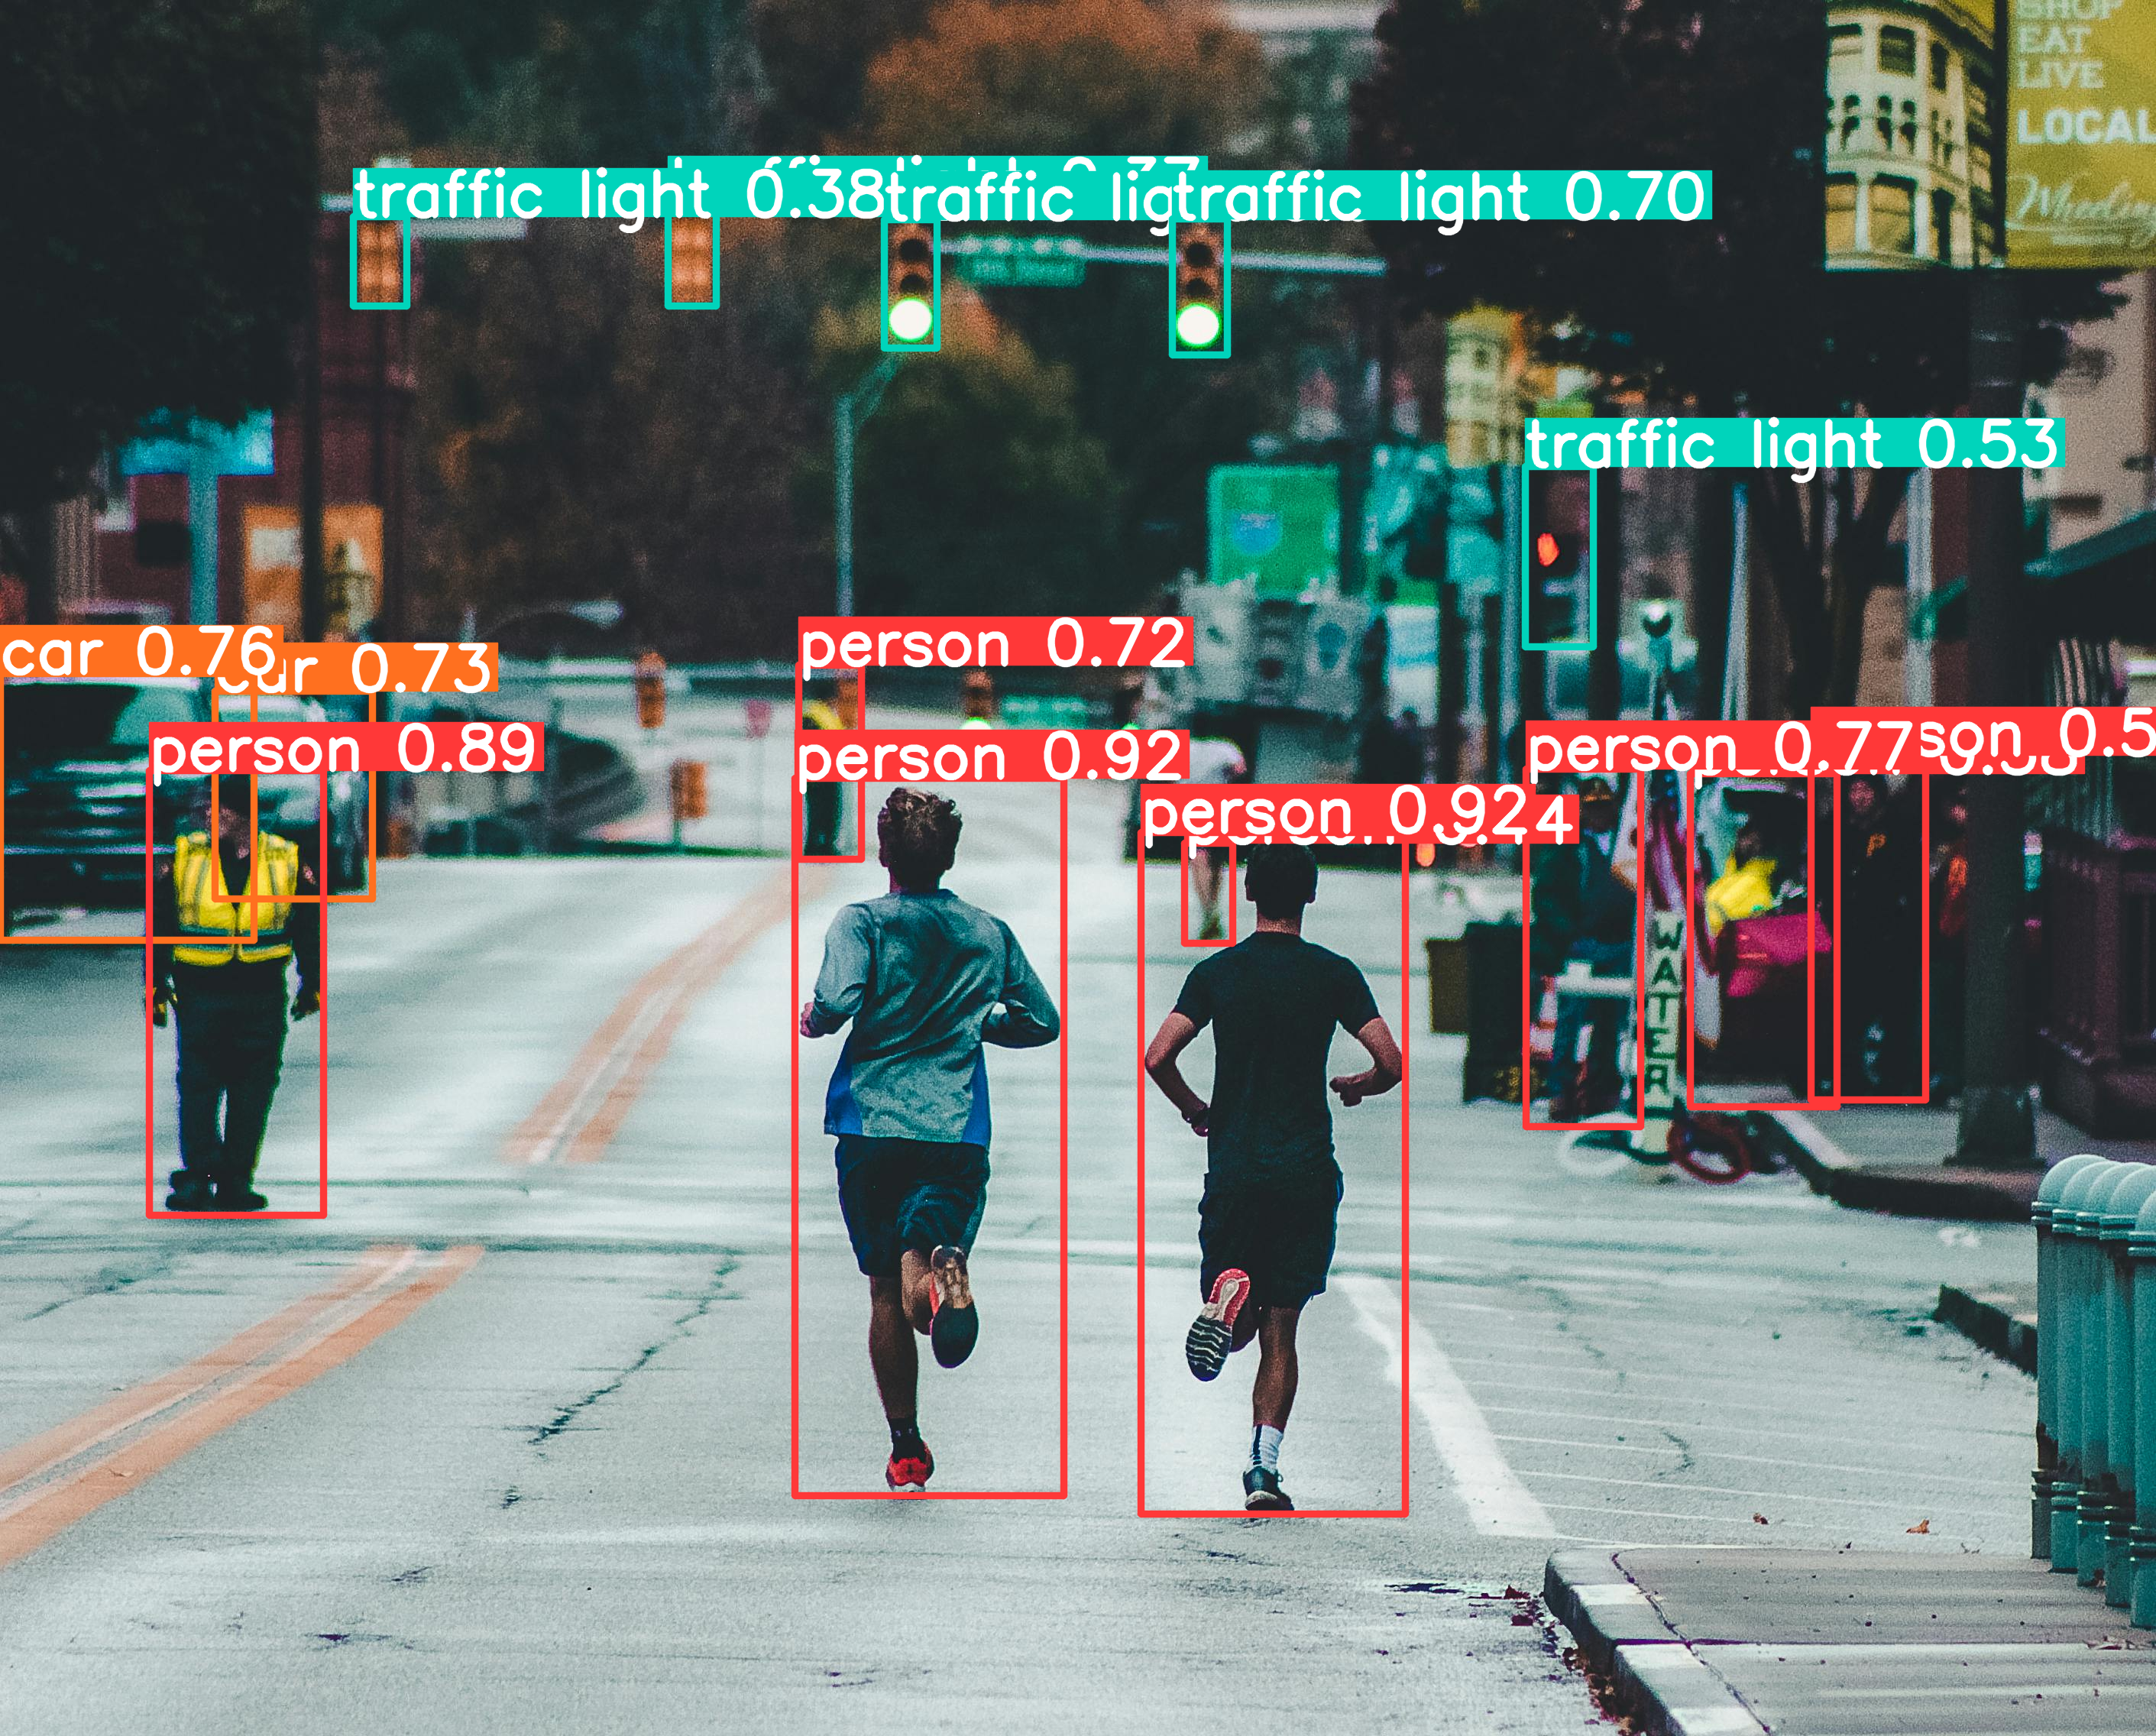

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 2272x2822 8 persons, 2 cars, 5 traffic lights
Speed: 162.9ms pre-process, 358.4ms inference, 35.8ms NMS per image at shape (1, 3, 544, 640)

In [2]:
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set confidence threshold
model.conf = 0.3

# Function to perform object detection on an image
def detect_objects(image_url):
    # Extract image ID from URL
    image_id = image_url.split('/')[-2]

    # Construct direct image URL
    direct_url = f"https://drive.google.com/uc?id={image_id}"

    # Load the image
    response = requests.get(direct_url)
    img = Image.open(BytesIO(response.content))

    # Perform object detection
    results = model(img)

    # Display the results with smaller size
    plt.figure(figsize=(4, 2))
    results.show()

    # Return the results
    return results

# URL of the image
image_url = "https://drive.google.com/file/d/16NybAvrjTcPVbSYxznlzoESWmPSCFlD_/view"

# Perform object detection on the image
detect_objects(image_url)